In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    include("/home/sergey/work/repo/dynamical-systems/system.jl")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


jac_FHN (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = 0..40, 0..1,  0..1
box = E × x × y
using CairoMakie

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 500; tt = 1000; tstep = 0.001
integ_set = (alg = Vern9(), adaptive = false, dt = tstep)

(alg = Vern9(; stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false), lazy = true,), adaptive = false, dt = 0.001)

In [5]:
# I0 = -0.9; U0 = 0.265;
I0 = -0.9; U0 = 0.265; # I0 = -1.1065337 # Hopf
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [8.638526524981895, 0.7320692774159767, 0.40718205935401675]

3-element Vector{Float64}:
 8.638526524981895
 0.7320692774159767
 0.40718205935401675

In [6]:
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.265, 0.305, 0.3, -0.9]
 time:          0.0
 state:         [8.638526524981895, 0.7320692774159767, 0.40718205935401675]


In [7]:
tr, trange = trajectory(ds, time; Δt = integ_set.dt, Ttr = 0);

In [8]:
lb_size = 35; tck_size = 30;

In [9]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_)

(3-dimensional StateSpaceSet{Float64} with 1 points, Vector{ComplexF64}[[-8.683382002681704 + 0.0im, -0.7378193620852681 - 16.67257174941345im, -0.7378193620852681 + 16.67257174941345im]], Bool[1])

In [10]:
fp

3-dimensional StateSpaceSet{Float64} with 1 points
 9.29788  0.734604  0.419388

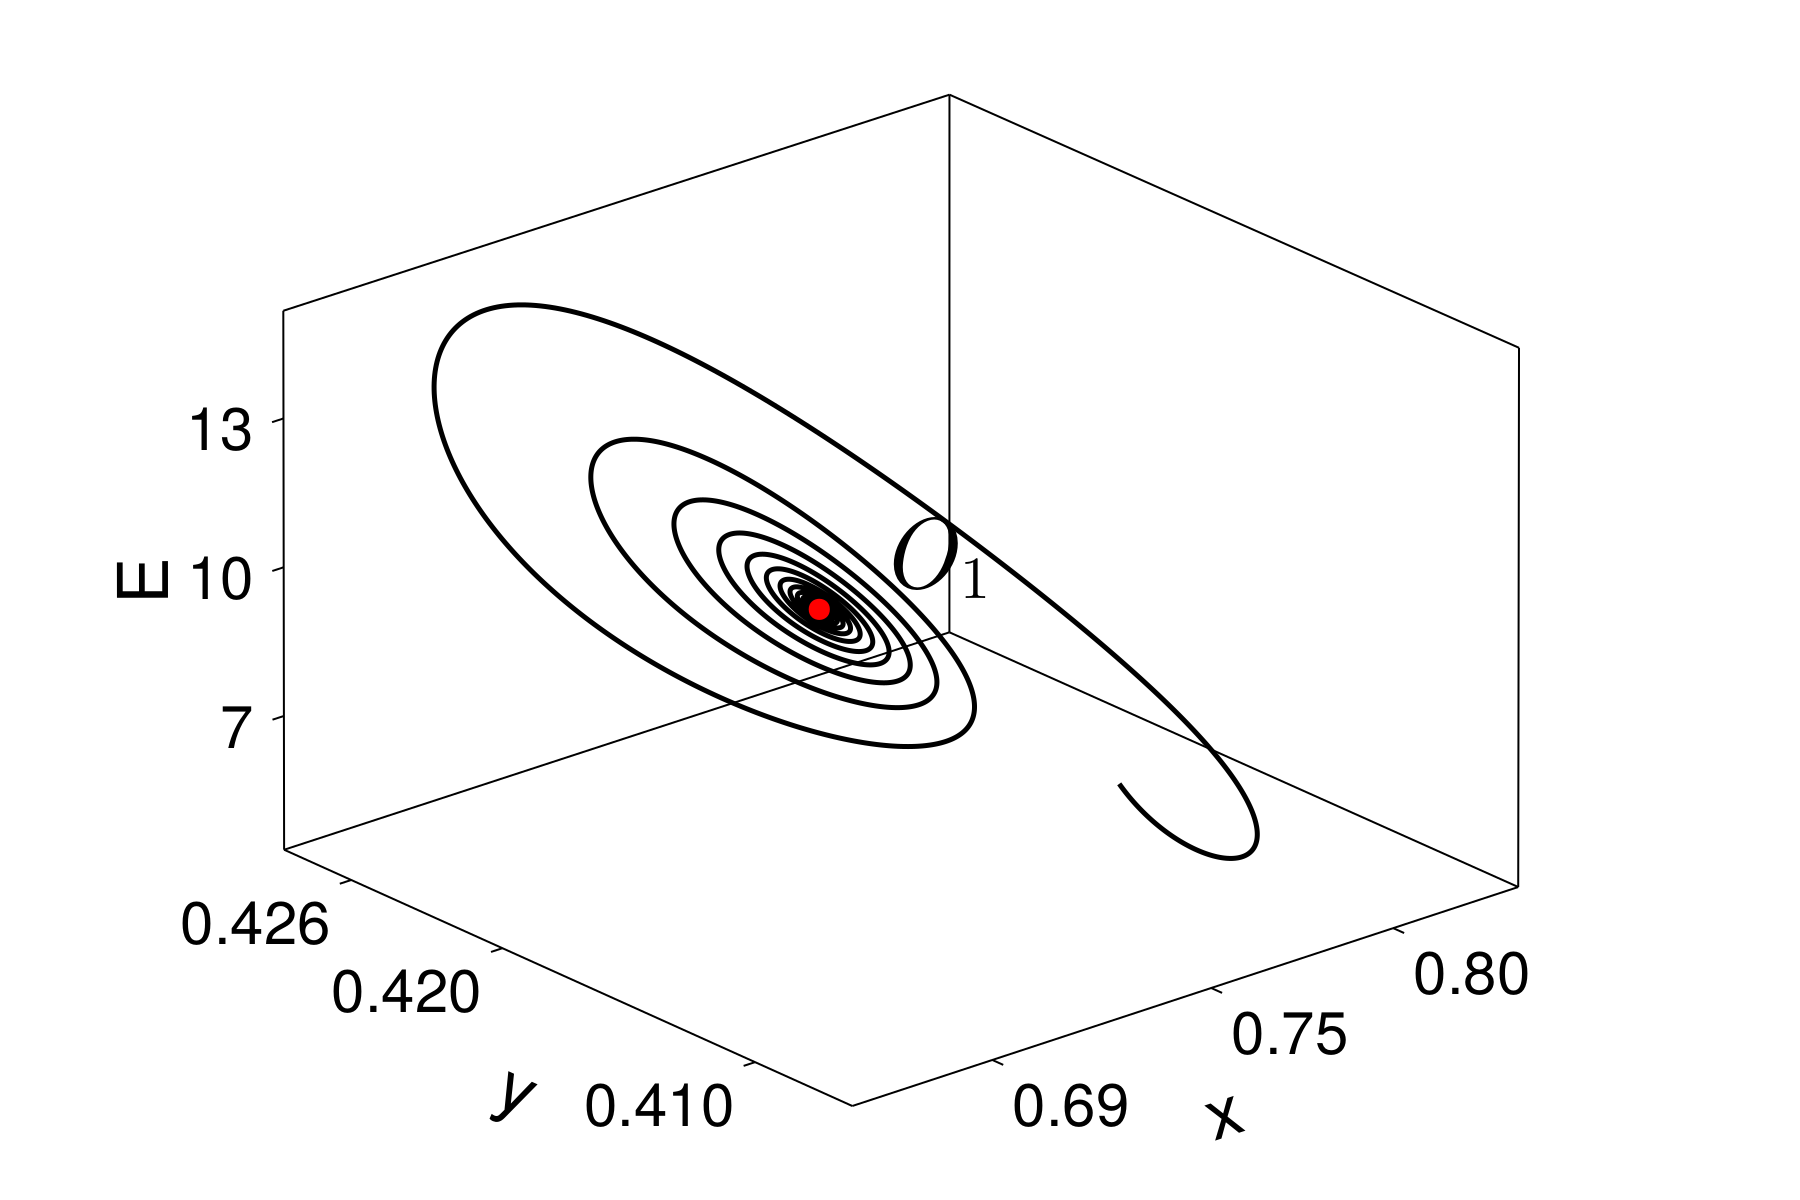

CairoMakie.Screen{IMAGE}


In [13]:
ts, tf = 1, 20000
f = Figure(size = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                xticks = [0.69, 0.75, 0.80], yticks = [0.410, 0.42, 0.426], zticks = [7, 10, 13])
lines!(axis3, tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 2.5, color = :black)

#scatter!(fp[1][2], fp[1][3], fp[1][1], color = :blue, markersize = 20.0)

scatter!(fp[1][2], fp[1][3], fp[1][1], color = :red, markersize = 15.0)
text!(fp[1][2], fp[1][3], fp[1][1], text = L"O_{1}", fontsize = 50, color = :black, align = (:left, :baseline), offset = (30, 0))

display(f)

In [14]:
cd("/home/sergey/MEGA/dynamical-systems/Tsodyks Markram/images")
save("stable_equilibrium.pdf", f)

CairoMakie.Screen{PDF}
